# Trabajo Práctico 4

# Imports y función de entrenamiento

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, zero_one_loss, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import copy
import math
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [6]:
def entrenar_KNN(clf, max_k, X_train, y_train, X_val, y_val, X_test, y_test):
    if type(clf) == KNeighborsRegressor:
      error_fun = mean_squared_error
    else:
      error_fun = zero_one_loss
    best_clf = None
    best_error = 1.0
    train_errors = []
    val_errors = []
    test_errors = []
    for k in range(max_k):
        clf.n_neighbors = k+1
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_train)
        train_error = error_fun(y_train, y_pred)

        y_pred = clf.predict(X_val)
        val_error = error_fun(y_val, y_pred)

        y_pred = clf.predict(X_test)
        test_error = error_fun(y_test, y_pred)

        train_errors.append(train_error)
        val_errors.append(val_error)
        test_errors.append(test_error)
        if val_error < best_error:
            best_clf = copy.deepcopy(clf)
            best_error = val_error
    return best_clf, train_errors, val_errors, test_errors

In [5]:
def cargar_csv(path, xcols=2, delim_whitespace=False):
    """
    Argumentos:
      path (str): ruta al archivo csv a cargar
      xcols (int): cantidad de columnas que representan las entradas,
        la columna restante representara la clase o dato de salida
    """
    df = pd.read_csv(path, delim_whitespace=delim_whitespace, header=None)
    X = df.loc[:, 0:(xcols-1)]
    y = df.loc[:, xcols]
    return X,y

# Ejercicio A

## Espirales originales

In [32]:
X_data, y_data = cargar_csv("./data/espirales_con_ruido/c_0.data", 2)
X_test, y_test = cargar_csv("./data/espirales_con_ruido/c_0.test", 2)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.2)

C:\Users\Certi\AppData\Local\Temp\ipykernel_21296\1536466213.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=delim_whitespace, header=None)
C:\Users\Certi\AppData\Local\Temp\ipykernel_21296\1536466213.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=delim_whitespace, header=None)


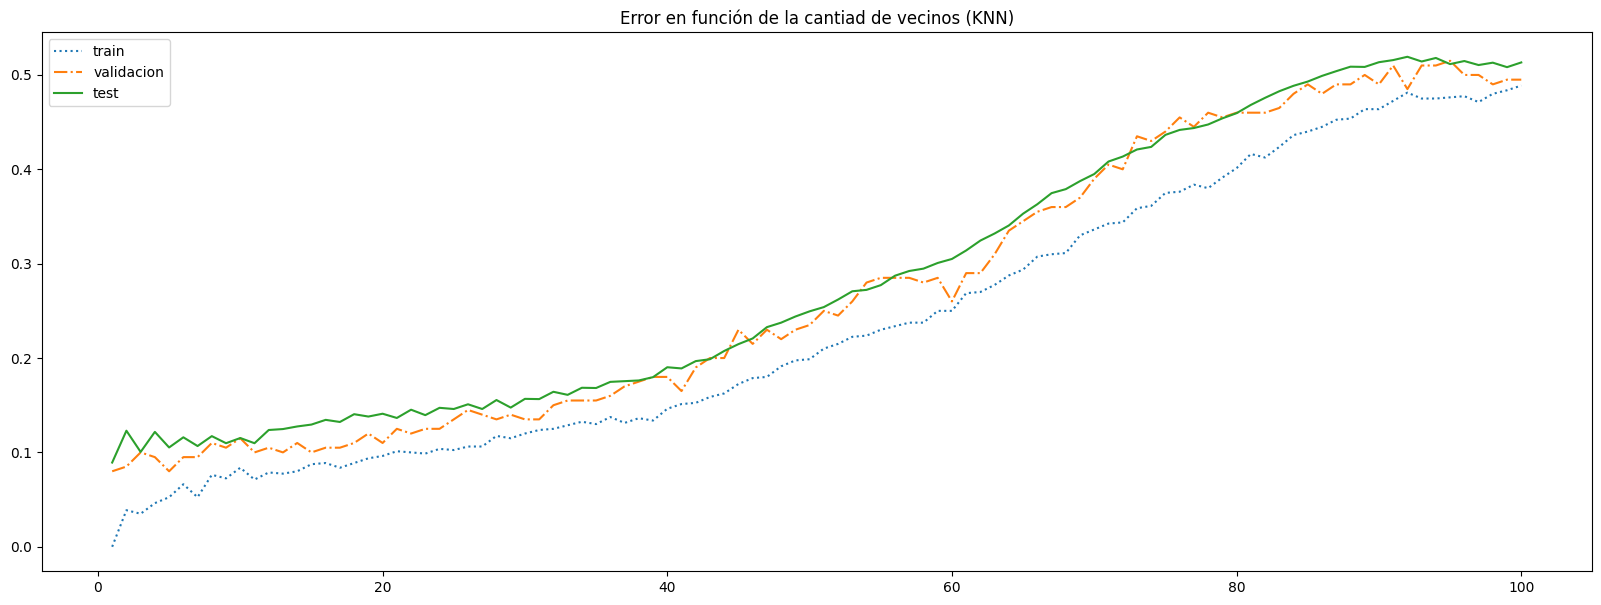

In [33]:
# KNN
max_k = 100
clf = KNeighborsClassifier()
best_clf_KNN, train_errors_KNN, val_errors_KNN, test_errors_KNN = entrenar_KNN(clf, max_k, X_train, y_train, X_val, y_val, X_test, y_test)

rango = range(1, max_k+1)
plt.figure(figsize=(20, 7))
plt.plot(rango, train_errors_KNN, label="train", linestyle=":")
plt.plot(rango, val_errors_KNN, label="validacion", linestyle="-.")
plt.plot(rango, test_errors_KNN, label="test", linestyle="-")
plt.title(f'Error en función de la cantiad de vecinos (KNN)')
plt.legend()
plt.show()

In [38]:
print(f"Mejor cantidad de vecinos: {best_clf_KNN.n_neighbors}")
print(f"Error en conjunto de entrenamiento: {train_errors_KNN[best_clf_KNN.n_neighbors-1]}")
print(f"Error en conjunto de validación: {val_errors_KNN[best_clf_KNN.n_neighbors-1]}")
print(f"Error en conjunto de test: {test_errors_KNN[best_clf_KNN.n_neighbors-1]}")

Mejor cantidad de vecinos: 1
Error en conjunto de entrenamiento: 0.0
Error en conjunto de validación: 0.07999999999999996
Error en conjunto de test: 0.08925000000000005


In [39]:
t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
t.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002,
                       min_samples_leaf=5, random_state=0)

In [40]:
print(f"Error de arbol en conjunto de entrenamiento: {zero_one_loss(y_train, t.predict(X_train))}")
print(f"Error de arbol en conjunto de validación: {zero_one_loss(y_val, t.predict(X_val))}")
print(f"Error de arbol en conjunto de test: {zero_one_loss(y_test, t.predict(X_test))}")

Error de arbol en conjunto de entrenamiento: 0.07499999999999996
Error de arbol en conjunto de validación: 0.09499999999999997
Error de arbol en conjunto de test: 0.15025


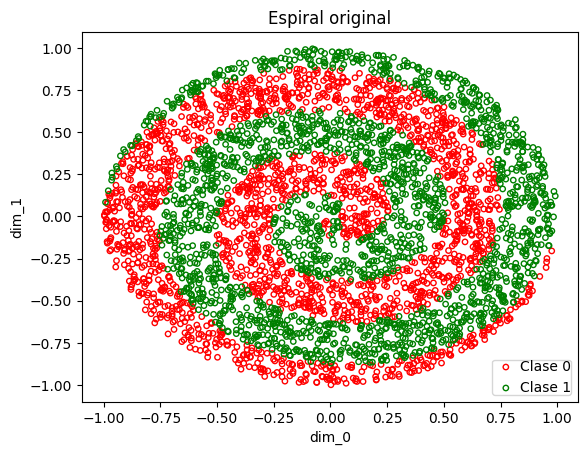

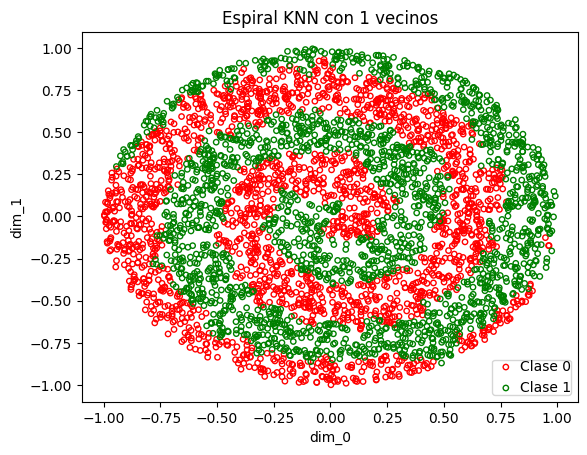

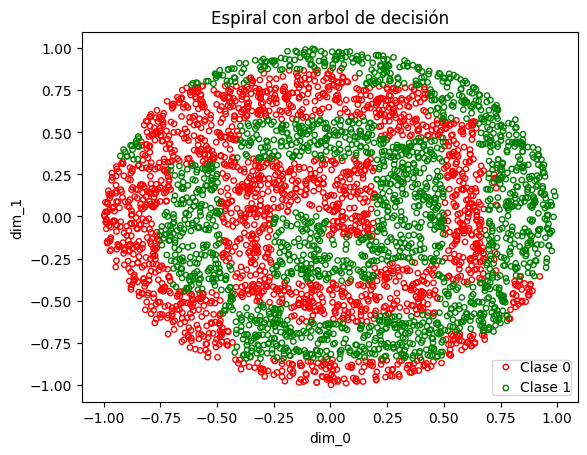

In [42]:
idx = np.where(y_test == 0)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)

idx = np.where(y_test == 1)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral original')
plt.show()

P_test = best_clf_KNN.predict(X_test)

idx = np.where(P_test == 0)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)
idx = np.where(P_test == 1)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral KNN con {best_clf_KNN.n_neighbors} vecinos')
plt.show()

P_test = t.predict(X_test)

idx = np.where(P_test == 0)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)
idx = np.where(P_test == 1)
plt.scatter(
    X_test.to_numpy()[idx, 0],
    X_test.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral con arbol de decisión')
plt.show()

## Espirales con ruido

In [45]:
X_data, y_data = cargar_csv("./data/espirales_con_ruido/c_2.data", 4)
X_test, y_test = cargar_csv("./data/espirales_con_ruido/c_2.test", 4)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.2)

C:\Users\Certi\AppData\Local\Temp\ipykernel_21296\1536466213.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=delim_whitespace, header=None)
C:\Users\Certi\AppData\Local\Temp\ipykernel_21296\1536466213.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=delim_whitespace, header=None)


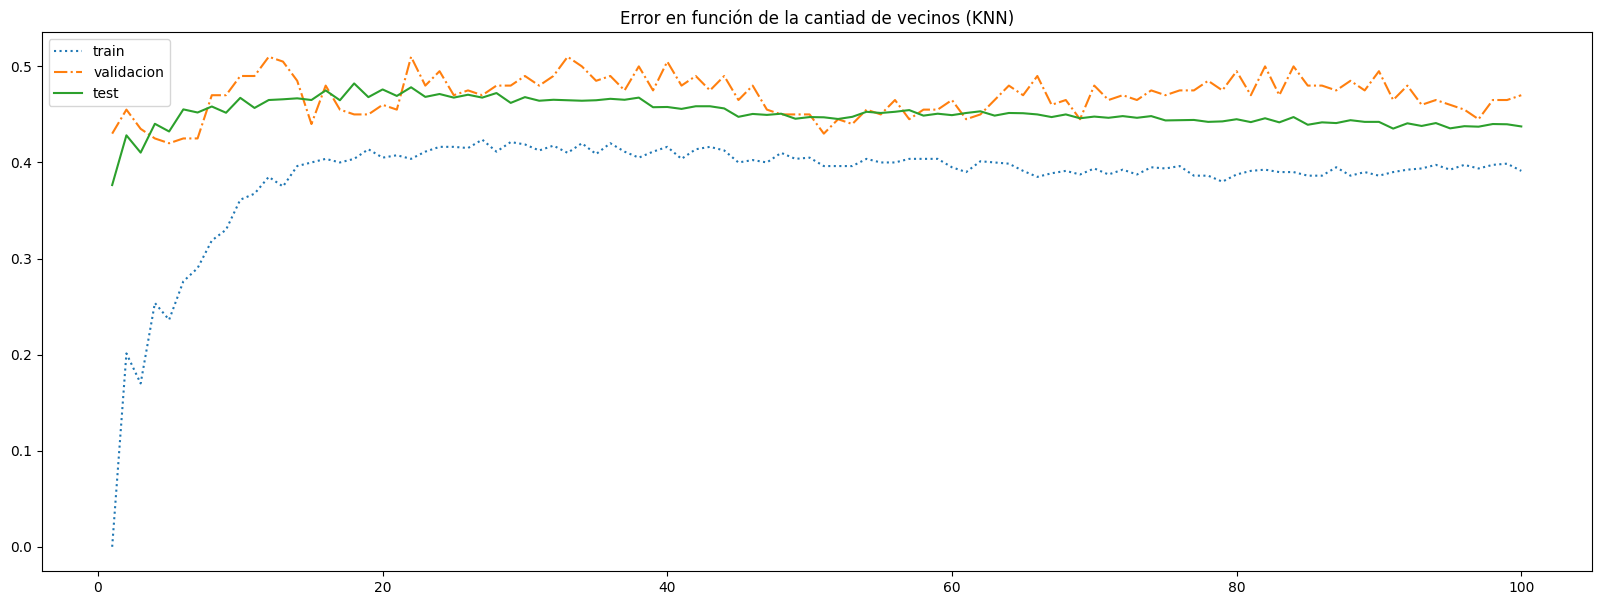

In [46]:
# KNN
max_k = 100
clf = KNeighborsClassifier()
best_clf_KNN, train_errors_KNN, val_errors_KNN, test_errors_KNN = entrenar_KNN(clf, max_k, X_train, y_train, X_val, y_val, X_test, y_test)

rango = range(1, max_k+1)
plt.figure(figsize=(20, 7))
plt.plot(rango, train_errors_KNN, label="train", linestyle=":")
plt.plot(rango, val_errors_KNN, label="validacion", linestyle="-.")
plt.plot(rango, test_errors_KNN, label="test", linestyle="-")
plt.title(f'Error en función de la cantiad de vecinos (KNN)')
plt.legend()
plt.show()

In [47]:
print(f"Mejor cantidad de vecinos: {best_clf_KNN.n_neighbors}")
print(f"Error en conjunto de entrenamiento: {train_errors_KNN[best_clf_KNN.n_neighbors-1]}")
print(f"Error en conjunto de validación: {val_errors_KNN[best_clf_KNN.n_neighbors-1]}")
print(f"Error en conjunto de test: {test_errors_KNN[best_clf_KNN.n_neighbors-1]}")

Mejor cantidad de vecinos: 5
Error en conjunto de entrenamiento: 0.23624999999999996
Error en conjunto de validación: 0.42000000000000004
Error en conjunto de test: 0.43225


In [48]:
t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
t.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002,
                       min_samples_leaf=5, random_state=0)

In [49]:
print(f"Error de arbol en conjunto de entrenamiento: {zero_one_loss(y_train, t.predict(X_train))}")
print(f"Error de arbol en conjunto de validación: {zero_one_loss(y_val, t.predict(X_val))}")
print(f"Error de arbol en conjunto de test: {zero_one_loss(y_test, t.predict(X_test))}")

Error de arbol en conjunto de entrenamiento: 0.06999999999999995
Error de arbol en conjunto de validación: 0.20999999999999996
Error de arbol en conjunto de test: 0.19525000000000003


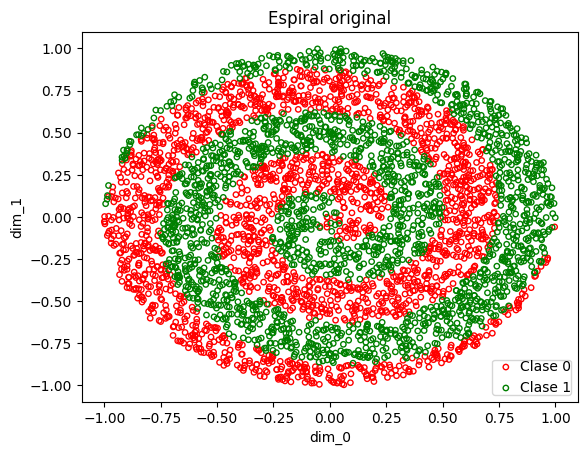

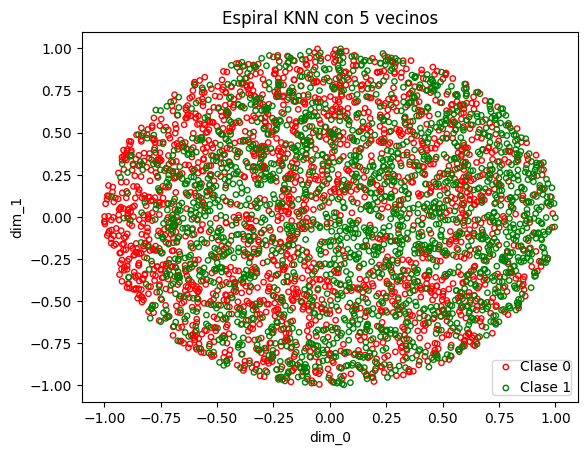

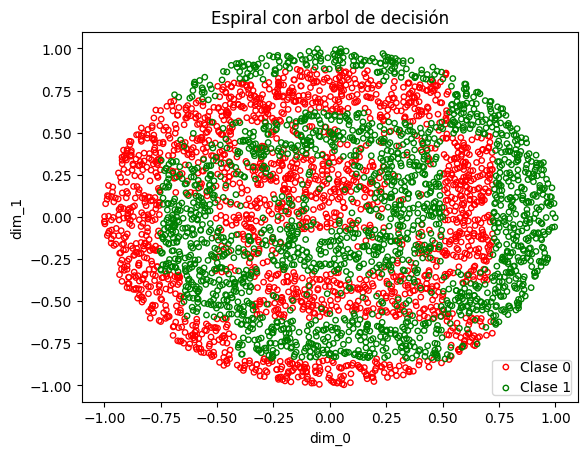

In [50]:
X_test_2_dims = X_test.iloc[:, 0:2]

idx = np.where(y_test == 0)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)

idx = np.where(y_test == 1)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral original')
plt.show()

P_test = best_clf_KNN.predict(X_test)

idx = np.where(P_test == 0)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)
idx = np.where(P_test == 1)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral KNN con {best_clf_KNN.n_neighbors} vecinos')
plt.show()

P_test = t.predict(X_test)

idx = np.where(P_test == 0)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='r',
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    s=15,
)
idx = np.where(P_test == 1)
plt.scatter(
    X_test_2_dims.to_numpy()[idx, 0],
    X_test_2_dims.to_numpy()[idx, 1],
    facecolors='none',
    edgecolors='g',
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    s=15,
)

plt.xlabel("dim_0")
plt.ylabel("dim_1")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral con arbol de decisión')
plt.show()

## Análisis

# Ejercicio B

# Ejercicio C

# Ejercicio D

# Ejercicio E

# Ejercicio F